<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px"> 
<h1 style="color: #1F74BA";"><strong> Customer Shopping Trends </strong></h1>
</div>

<img src="https://img.freepik.com/free-vector/people-buying-online_24908-55868.jpg?ga=GA1.1.1041298133.1740900820&semt=ais_hybrid" width=1200>

<div style="background-color: #0000; padding: 20px; border-radius: 10px;font-size:25px;font-weight:10px">
  <h1 style="color: #333;"><strong>Exploratory Data Analysis</strong></h1>
</div>

<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;font-weight:10px">
  <h1 style="color: #1F74BA;"><strong>Importing Libraries</strong></h1>
</div>

In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv


<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Loading and Checking the dataset</strong></h1>
</div>

In [51]:
shopping_trends = pd.read_csv('/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv')

In [52]:
shopping_trends.set_index('Customer ID',inplace=True)

In [53]:
shopping_trends.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [54]:
shopping_trends.tail()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [55]:
shopping_trends.shape

(3900, 18)

In [56]:
shopping_trends.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Information About the dataset</strong></h1>
</div>

In [57]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Code Us

<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Checking if there are missing values in the dataset</strong></h1>
</div>

In [58]:
shopping_trends.isnull().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Checking if there are Duplicate values in the dataset</strong></h1>
</div>

In [59]:
shopping_trends.duplicated().sum()

0

<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Descriptive Statistics of the dataset</strong></h1>
</div>

In [60]:
shopping_trends.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [61]:
shopping_trends.describe(include=object)

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Gender Distribution Analysis</strong></h1>
</div>

In [62]:
shopping_trends['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [63]:
shopping_trends[shopping_trends['Gender']== 'Female'].count()

Age                         1248
Gender                      1248
Item Purchased              1248
Category                    1248
Purchase Amount (USD)       1248
Location                    1248
Size                        1248
Color                       1248
Season                      1248
Review Rating               1248
Subscription Status         1248
Payment Method              1248
Shipping Type               1248
Discount Applied            1248
Promo Code Used             1248
Previous Purchases          1248
Preferred Payment Method    1248
Frequency of Purchases      1248
dtype: int64

In [64]:
shopping_trends[shopping_trends['Gender']== 'Male'].count()

Age                         2652
Gender                      2652
Item Purchased              2652
Category                    2652
Purchase Amount (USD)       2652
Location                    2652
Size                        2652
Color                       2652
Season                      2652
Review Rating               2652
Subscription Status         2652
Payment Method              2652
Shipping Type               2652
Discount Applied            2652
Promo Code Used             2652
Previous Purchases          2652
Preferred Payment Method    2652
Frequency of Purchases      2652
dtype: int64


<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Identify Top Performing Category</strong></h1>
</div>

In [65]:
category_wise_purchases =shopping_trends.groupby('Category').agg({'Purchase Amount (USD)':'sum'}).sort_values('Purchase Amount (USD)',ascending=False).round(2)

In [66]:
category_wise_purchases

,Purchase Amount (USD)
Category,
Clothing,104264
Accessories,74200
Footwear,36093
Outerwear,18524


In [67]:
# Top 10 best-selling products
shopping_trends["Item Purchased"].value_counts().head(10)

Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Name: count, dtype: int64

<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Compare Store Performance Across Different Location</strong></h1>
</div>

In [68]:
high_Sales_Locations = shopping_trends.groupby('Location').agg({'Purchase Amount (USD)':'mean'}).sort_values('Purchase Amount (USD)',ascending=False).round(2).head(10)

In [69]:
high_Sales_Locations

,Purchase Amount (USD)
Location,
Alaska,67.60
Pennsylvania,66.57
Arizona,66.55
West Virginia,63.88
Nevada,63.38
Washington,63.33
North Dakota,62.89
Virginia,62.88
Utah,62.58


In [70]:
locations_With_Low_Sales= high_Sales_Locations.tail()

In [71]:
locations_With_Low_Sales

,Purchase Amount (USD)
Location,
Washington,63.33
North Dakota,62.89
Virginia,62.88
Utah,62.58
Michigan,62.10


<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Customer Purchasing Patterns: A Seasonal and Demographic Analysis<strong></h1>
</div>

In [72]:
sales_by_category = shopping_trends.groupby(['Category']).agg({'Purchase Amount (USD)': ['sum', 'mean']}).round(2)

In [73]:
# If Category-A  purchase price (sum) increase and (mean)  decrease then we are selling lot of lower price product
#if Category-B  purchase price (sum) decrease  and (mean)  increase then we are selling fewer items but higher price
sales_by_category

Purchase Amount (USD)       
                              sum   mean
Category                                
Accessories                 74200  59.84
Clothing                   104264  60.03
Footwear                    36093  60.26
Outerwear                   18524  57.17

In [74]:
sales_by_gender_season  = shopping_trends.groupby(['Gender','Season']).agg({'Purchase Amount (USD)':'mean'}).round(2)

In [75]:
sales_by_gender_season

Purchase Amount (USD)
Gender Season                       
Female Fall                    61.56
       Spring                  58.79
       Summer                  60.60
       Winter                  60.00
Male   Fall                    61.55
       Spring                  58.71
       Summer                  57.41
       Winter                  60.52

In [76]:
Trendsales_by_category_season = shopping_trends.groupby(['Category','Season']).agg({'Purchase Amount (USD)':'mean'}).round(2)

In [77]:
Trendsales_by_category_season

Purchase Amount (USD)
Category    Season                       
Accessories Fall                    61.34
            Spring                  56.50
            Summer                  60.99
            Winter                  60.37
Clothing    Fall                    61.41
            Spring                  61.00
            Summer                  56.56
            Winter                  60.88
Footwear    Fall                    63.71
            Spring                  58.62
            Summer                  58.71
            Winter                  60.57
Outerwear   Fall                    59.76
            Spring                  54.63
            Summer                  57.04
            Winter                  57.02

In [78]:
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Average Spending by Age <strong></h1>
</div>


In [79]:
# Average spending by age 
shopping_trends["Age Group"] = pd.cut(shopping_trends["Age"], bins=[18, 25, 35, 45, 55, 65, 70], labels=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"])
avg_spending_by_age = shopping_trends.groupby("Age Group").agg({"Purchase Amount (USD)":"mean"}).round(2)

In [80]:
avg_spending_by_age

,Purchase Amount (USD)
Age Group,
18-24,60.74
25-34,59.76
35-44,59.31
45-54,60.58
55-64,59.14
65+,58.88


<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Top 10 highest spending Customer<strong></h1>
</div>


In [111]:
# Top 10 highest spending customers
top_10_customers = shopping_trends.nlargest(10, 'Purchase Amount (USD)')

In [112]:
top_10_customers.head(10)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Group
Customer ID,,,,,,,,,,,,,,,,,,,
43,20,Male,Coat,Outerwear,100,Tennessee,M,Beige,Spring,4.1,Yes,Bank Transfer,Free Shipping,Yes,Yes,15,PayPal,Annually,18-24
96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,Yes,PayPal,Free Shipping,Yes,Yes,48,PayPal,Monthly,35-44
194,36,Male,Belt,Accessories,100,North Dakota,S,Silver,Fall,3.0,Yes,PayPal,Standard,Yes,Yes,29,Venmo,Annually,35-44
205,24,Male,Sneakers,Footwear,100,Arizona,M,Yellow,Fall,4.0,Yes,PayPal,Store Pickup,Yes,Yes,35,Cash,Bi-Weekly,18-24
244,25,Male,Jewelry,Accessories,100,Kentucky,M,Olive,Winter,2.8,Yes,Credit Card,2-Day Shipping,Yes,Yes,4,Debit Card,Monthly,18-24
249,47,Male,Belt,Accessories,100,Pennsylvania,M,Blue,Winter,4.8,Yes,Venmo,Express,Yes,Yes,33,PayPal,Weekly,45-54
456,54,Male,Blouse,Clothing,100,Utah,XL,Gold,Fall,3.6,Yes,Credit Card,Store Pickup,Yes,Yes,50,Debit Card,Fortnightly,45-54
519,24,Male,Blouse,Clothing,100,Oregon,M,Beige,Fall,2.9,Yes,PayPal,Next Day Air,Yes,Yes,16,Venmo,Every 3 Months,18-24
582,32,Male,Sweater,Clothing,100,Iowa,XL,Charcoal,Winter,2.7,Yes,Credit Card,Store Pickup,Yes,Yes,12,Bank Transfer,Every 3 Months,25-34


<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Customer Satisfaction Analysis Based on Reviews<strong></h1>
</div>


In [83]:
 shopping_trends['Review Rating'].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

In [84]:
reviews_analysis = shopping_trends['Review Rating'].value_counts().sort_index()

In [85]:
reviews_analysis

Review Rating
2.5     66
2.6    159
2.7    154
2.8    136
2.9    170
3.0    162
3.1    157
3.2    152
3.3    152
3.4    182
3.5    156
3.6    149
3.7    156
3.8    142
3.9    163
4.0    181
4.1    148
4.2    171
4.3    147
4.4    158
4.5    139
4.6    174
4.7    148
4.8    144
4.9    166
5.0     68
Name: count, dtype: int64

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
category_wise_purchases

,Purchase Amount (USD)
Category,
Clothing,104264
Accessories,74200
Footwear,36093
Outerwear,18524


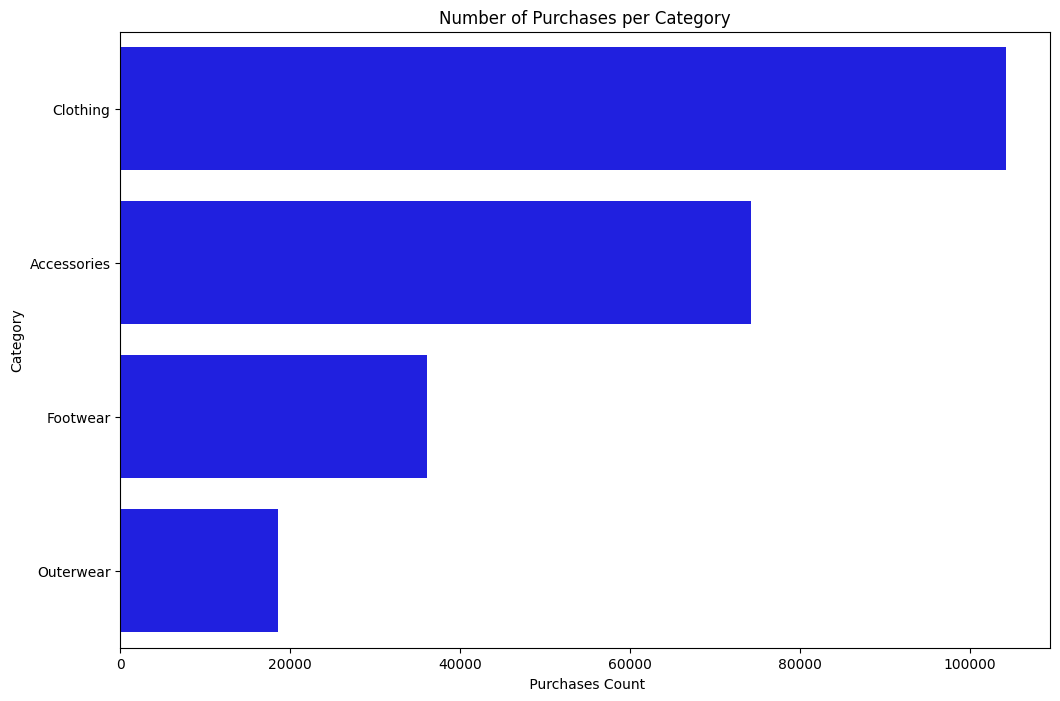

In [88]:
plt.figure(figsize=(12,8))
sns.barplot(
              data= category_wise_purchases,
              x="Purchase Amount (USD)",
              y= category_wise_purchases.index, 
              color='b'
              )
plt.xlabel(' Purchases Count')
plt.ylabel('Category')
plt.title('Number of Purchases per Category')
plt.show()

Text(0.5, 1.0, 'Distribution of Gender')

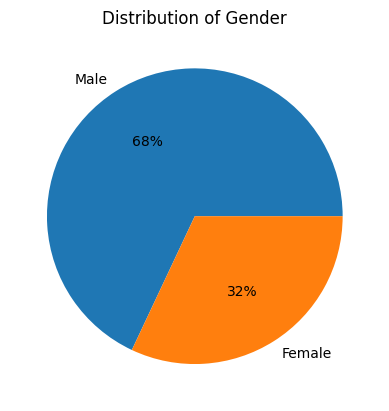

In [89]:
gender_count = shopping_trends['Gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index,autopct='%.0f%%')
plt.title('Distribution of Gender')

In [90]:
sales_by_gender_season

Purchase Amount (USD)
Gender Season                       
Female Fall                    61.56
       Spring                  58.79
       Summer                  60.60
       Winter                  60.00
Male   Fall                    61.55
       Spring                  58.71
       Summer                  57.41
       Winter                  60.52

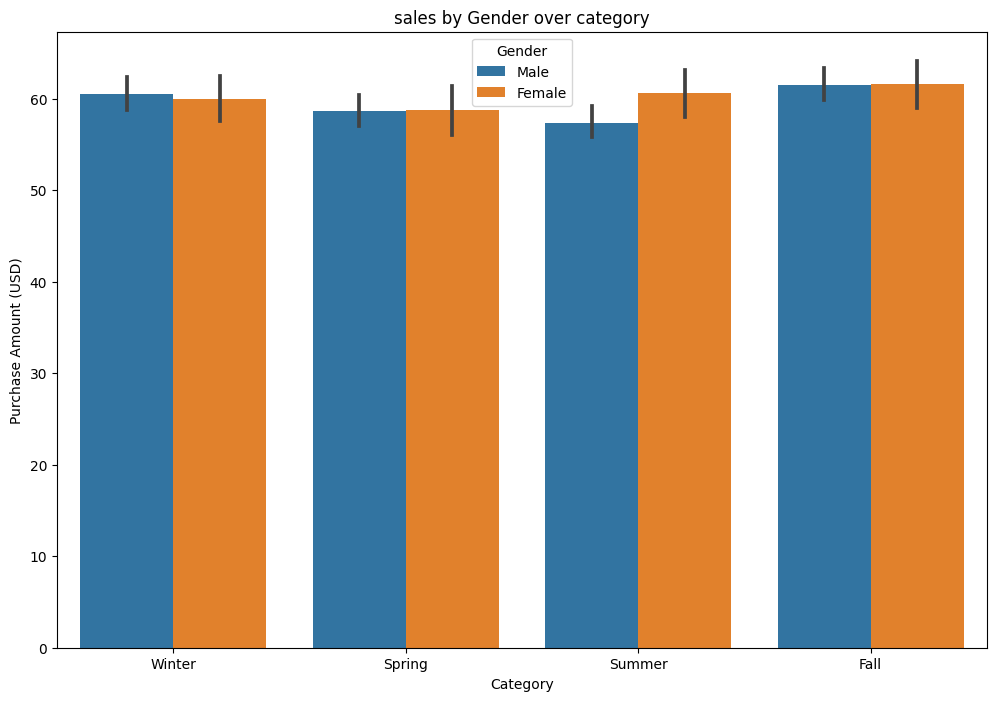

In [115]:
plt.figure(figsize=(12,8))
sns.barplot(data= shopping_trends, 
            x="Season",
            y="Purchase Amount (USD)",
            hue="Gender"
           )
plt.title("sales by Gender over category")
plt.xlabel("Category")
plt.ylabel("Purchase Amount (USD)")
plt.show()

In [92]:
Trendsales_by_category_season

Purchase Amount (USD)
Category    Season                       
Accessories Fall                    61.34
            Spring                  56.50
            Summer                  60.99
            Winter                  60.37
Clothing    Fall                    61.41
            Spring                  61.00
            Summer                  56.56
            Winter                  60.88
Footwear    Fall                    63.71
            Spring                  58.62
            Summer                  58.71
            Winter                  60.57
Outerwear   Fall                    59.76
            Spring                  54.63
            Summer                  57.04
            Winter                  57.02

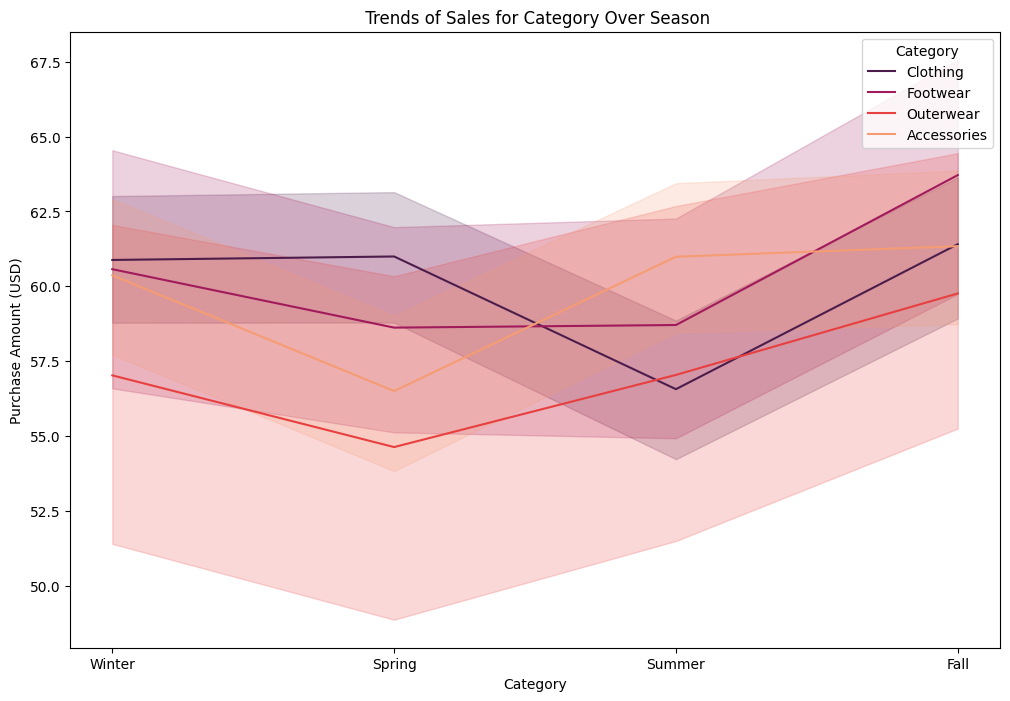

In [117]:
plt.figure(figsize=(12,8))
sns.lineplot(data= shopping_trends,
             x="Season", 
             y="Purchase Amount (USD)", 
             hue="Category",
             palette='rocket')
plt.title(" Trends of Sales for Category Over Season")
plt.xlabel("Category")
plt.ylabel("Purchase Amount (USD)")
plt.show()

In [94]:
high_Sales_Locations

,Purchase Amount (USD)
Location,
Alaska,67.60
Pennsylvania,66.57
Arizona,66.55
West Virginia,63.88
Nevada,63.38
Washington,63.33
North Dakota,62.89
Virginia,62.88
Utah,62.58


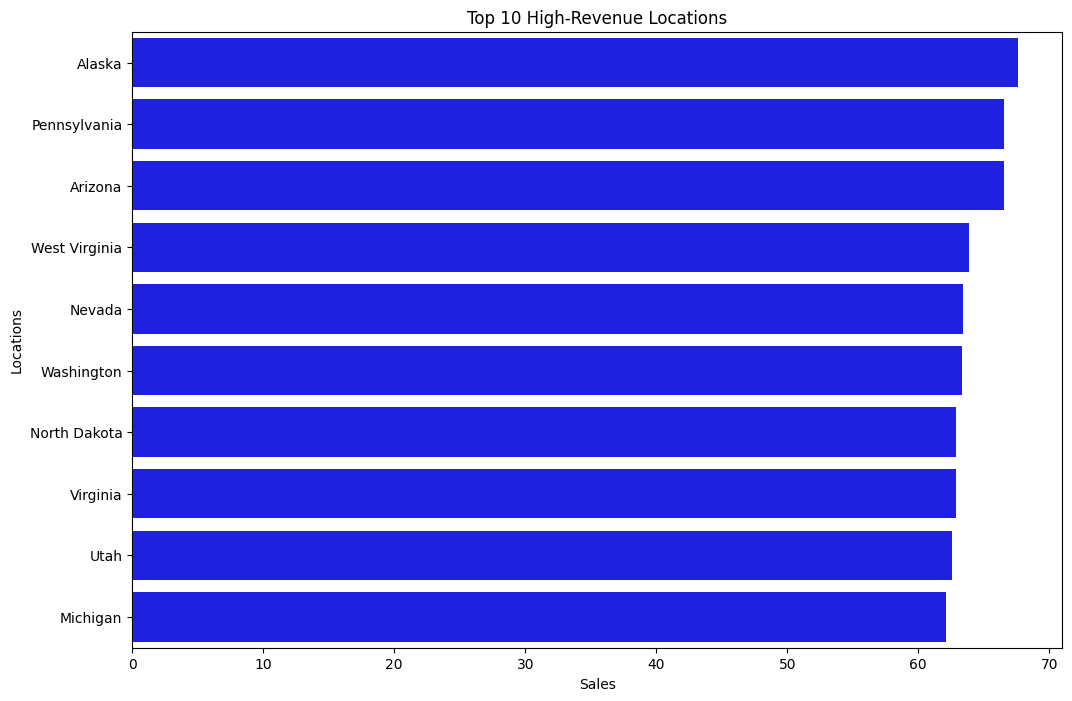

In [95]:
plt.figure(figsize=(12,8))
sns.barplot(data=high_Sales_Locations,
            x="Purchase Amount (USD)",
            y=high_Sales_Locations.index,
            color="blue")
plt.title("Top 10 High-Revenue Locations")
plt.xlabel("Sales")
plt.ylabel("Locations")
plt.show()

In [96]:
locations_With_Low_Sales

,Purchase Amount (USD)
Location,
Washington,63.33
North Dakota,62.89
Virginia,62.88
Utah,62.58
Michigan,62.10


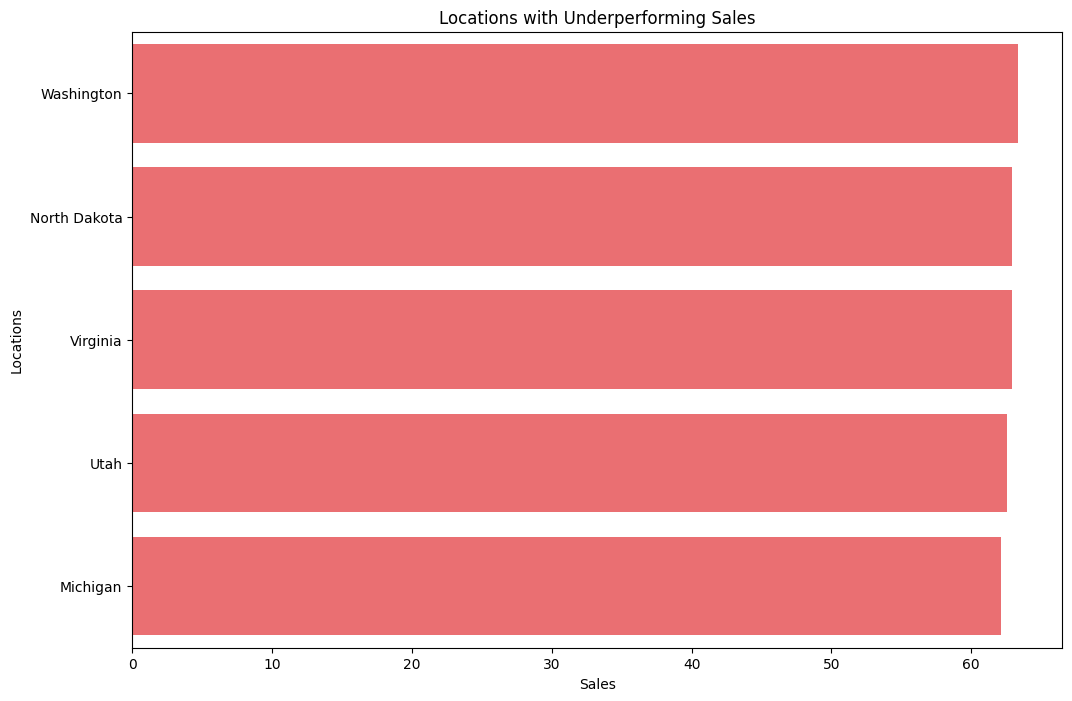

In [97]:
plt.figure(figsize=(12,8))
sns.barplot(data=locations_With_Low_Sales,
            x="Purchase Amount (USD)",
            y=locations_With_Low_Sales.index,
            color="#FF5A5F")
plt.title("Locations with Underperforming Sales")
plt.xlabel("Sales")
plt.ylabel("Locations")
plt.show()

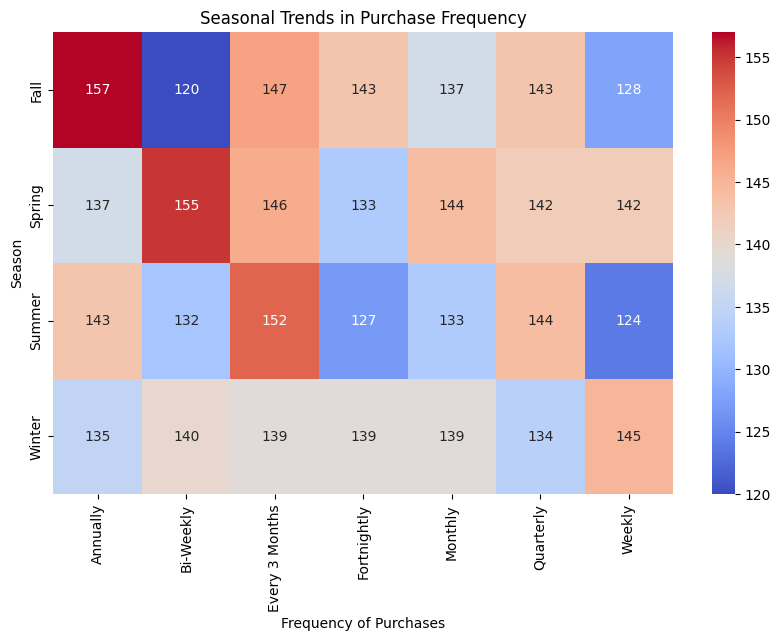

In [98]:
pivot = shopping_trends.pivot_table(index="Season", columns="Frequency of Purchases", aggfunc="size", fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="coolwarm", annot=True, fmt="d")
plt.title("Seasonal Trends in Purchase Frequency")
plt.show()

In [99]:
avg_spending_by_age

,Purchase Amount (USD)
Age Group,
18-24,60.74
25-34,59.76
35-44,59.31
45-54,60.58
55-64,59.14
65+,58.88


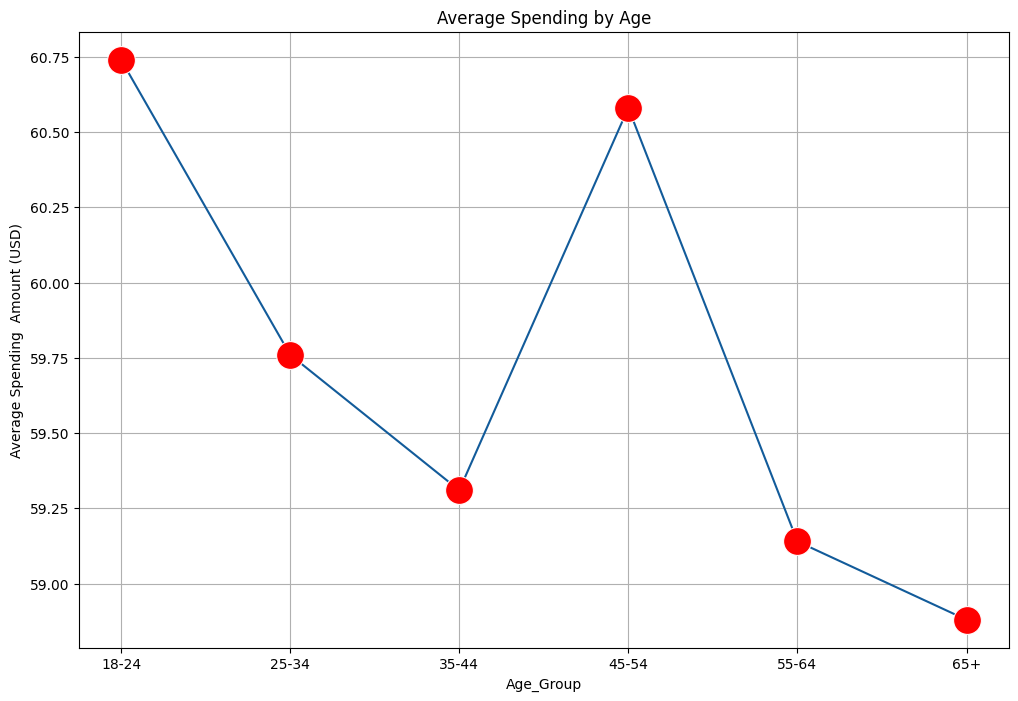

In [126]:
plt.figure(figsize=(12,8))
sns.lineplot(data=avg_spending_by_age,
            x=avg_spending_by_age.index,
            y="Purchase Amount (USD)",
            color='#125B9A',
             marker='o',
             ms=20,
             mfc='r'
            )
plt.title("Average Spending by Age")
plt.xlabel("Age_Group")
plt.ylabel("Average Spending  Amount (USD)")
plt.grid()
plt.show()

In [101]:
reviews_analysis

Review Rating
2.5     66
2.6    159
2.7    154
2.8    136
2.9    170
3.0    162
3.1    157
3.2    152
3.3    152
3.4    182
3.5    156
3.6    149
3.7    156
3.8    142
3.9    163
4.0    181
4.1    148
4.2    171
4.3    147
4.4    158
4.5    139
4.6    174
4.7    148
4.8    144
4.9    166
5.0     68
Name: count, dtype: int64

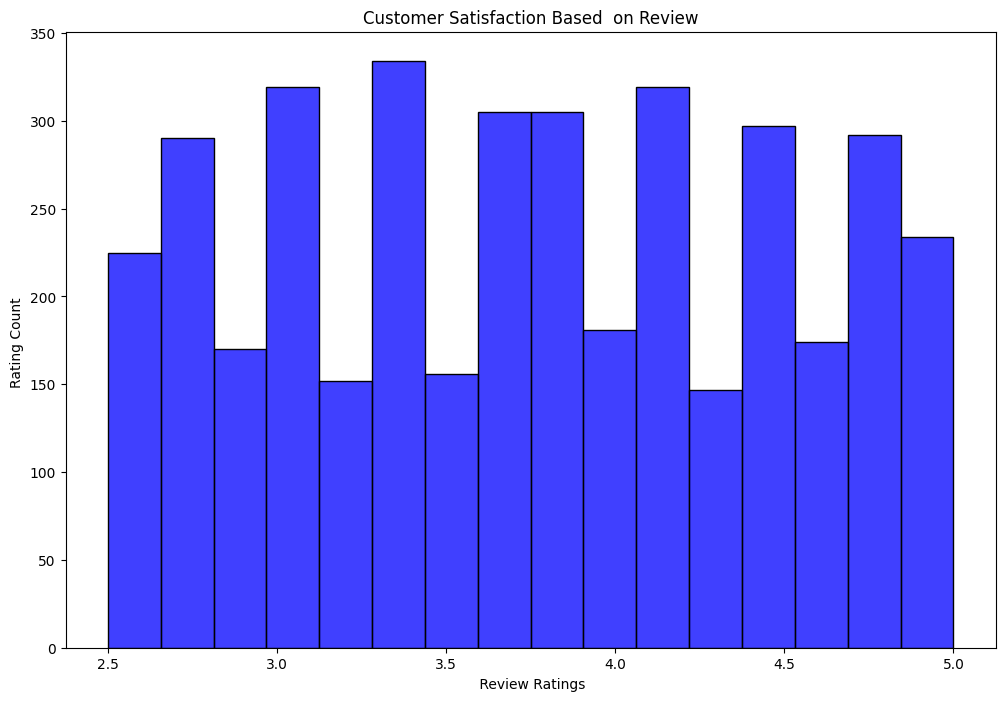

In [102]:
plt.figure(figsize=(12,8))
sns.histplot(data=shopping_trends['Review Rating'],color='b')
plt.title('Customer Satisfaction Based  on Review')
plt.xlabel(' Review Ratings')
plt.ylabel('Rating Count ')
plt.show()

<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong>Final Insights</strong></h1>
</div>

1) The chart shows that "Clothing" is bought way more often than other things like "Accessories," "Footwear," and "Outerwear." 
   So, clothing is a big deal for this business.    
2) The pie chart tells us that most customers (68%) are male, while fewer (32%) are female.    
3) The takeaway is that there's not a huge difference in how much men and women spend – they spend roughly the same amount in each season. 
3) Clothing sales stay pretty steady.People tend to spend a bit more on Outerwear in the Fall and Winter (maybe for colder weather).
   Accessories also see a bit of a rise in spending towards the Fall.
4) The store sells a lot in Alaska, but not as much in places like Michigan or Utah.
5) People in the 18-24 and 45-54 age groups tend to spend the most money on average.The oldest customers (65+) spend the least on average.
6) Most customers seem reasonably happy with their purchases, based on the ratings.

<div style="background-color: #F8D706; padding: 25px; border-radius: 10px;">
  <h1 style="color: #1F74BA;"><strong> Growth Recommendations</strong></h1>
</div>

1) Focus on Clothing: Since "Clothing" has the highest purchase count, prioritize marketing and inventory for this category. Ensure a wide variety and consider loyalty programs specifically       for clothing buyers.   
2) Target Male Customers: Given that the majority of customers are male, tailor marketing campaigns and product selections to their preferences. However, don't neglect female customers; e         explore ways to increase their engagement.   
3) Optimize for Peak Seasons: Increase inventory and marketing efforts in the Fall, as purchase frequency tends to be high then.   
4) Improve Underperforming Locations: Develop strategies to boost sales in Michigan, Utah, Virginia, North Dakota, and Washington. This could involve targeted advertising, special events, or      analyzing why sales are low (competition, demographics, etc.).   
5) Retain High-Spending Age Groups: Focus on maintaining customer loyalty among the 18-24 and 45-54 age groups, as they spend the most.